In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
sigorta=pd.read_csv('insurance.csv')
sigorta.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
sigorta.columns=['yas','cinsiyet','vki','cocuk','sigara','bolge','ucretler']
sigorta.head()

,yas,cinsiyet,vki,cocuk,sigara,bolge,ucretler
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


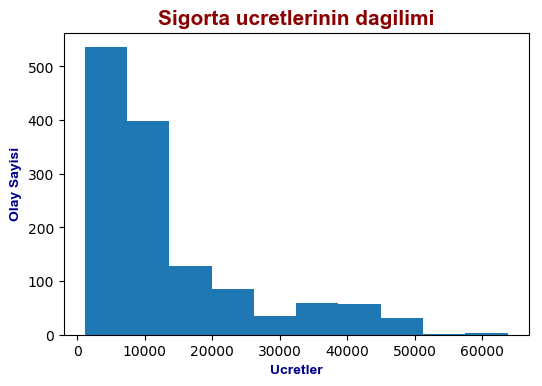

In [4]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,4), dpi = 100)

plt.hist(sigorta.ucretler)
plt.title("Sigorta ucretlerinin dagilimi", fontdict=baslik_font)
plt.xlabel("Ucretler", fontdict=eksen_font)
plt.ylabel("Olay Sayisi", fontdict=eksen_font)
plt.show()

In [7]:
sigorta["kadin_mi"] = pd.get_dummies(sigorta.cinsiyet)  ##  drop_first=True  ??? 
sigorta["sigara_icer_mi"] = sigorta.sigara.replace({'yes':1, "no":0})
sigorta[['kadin_mi','sigara_icer_mi']].head()

,kadin_mi,sigara_icer_mi
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [8]:
sigorta.head(10)

,yas,cinsiyet,vki,cocuk,sigara,bolge,ucretler,kadin_mi,sigara_icer_mi
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
5,31,female,25.740,0,no,southeast,3756.62160,1,0
6,46,female,33.440,1,no,southeast,8240.58960,1,0
7,37,female,27.740,3,no,northwest,7281.50560,1,0
8,37,male,29.830,2,no,northeast,6406.41070,0,0
9,60,female,25.840,0,no,northwest,28923.13692,1,0


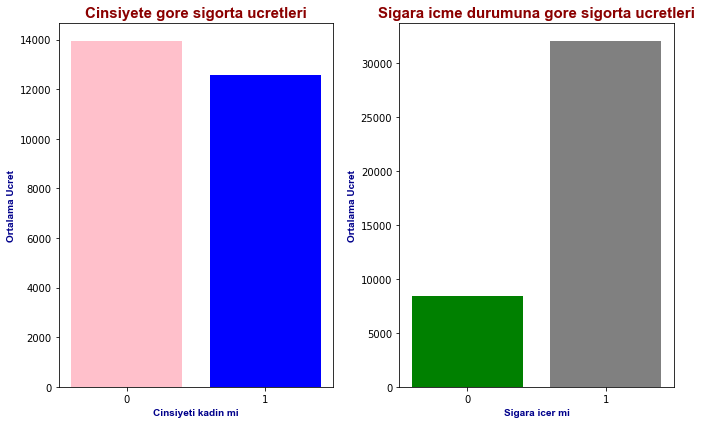

In [15]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.bar(sigorta.groupby("kadin_mi")["ucretler"].mean().index,
        sigorta.groupby("kadin_mi")["ucretler"].mean(),
        color=('pink','blue'))
plt.title("Cinsiyete gore sigorta ucretleri", fontdict=baslik_font)
plt.xlabel("Cinsiyeti kadin mi",fontdict=eksen_font)
plt.ylabel("Ortalama Ucret",fontdict=eksen_font)
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(sigorta.groupby("sigara_icer_mi")["ucretler"].mean().index,
        sigorta.groupby("sigara_icer_mi")["ucretler"].mean(),
        color=('green','grey'))
plt.title("Sigara icme durumuna gore sigorta ucretleri", fontdict=baslik_font)
plt.xlabel("Sigara icer mi",fontdict=eksen_font)
plt.ylabel("Ortalama Ucret",fontdict=eksen_font)
plt.xticks([0,1])

plt.tight_layout()
plt.show()

In [16]:
y=sigorta["ucretler"]
x=sigorta[["kadin_mi","sigara_icer_mi"]]

In [17]:
lrm=linear_model.LinearRegression()
lrm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print("Degiskenler :\n" , lrm.coef_)
print("Sabit deger (bias) :\n", lrm.intercept_)

Degiskenler :
 [   65.37843464 23622.1345855 ]
Sabit deger (bias) :
 8400.657392079142


In [21]:
import statsmodels.api as sm

x= sm.add_constant(x)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ucretler   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1088.
Date:                Fri, 29 May 2020   Prob (F-statistic):          4.78e-281
Time:                        15:38:46   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1335   BIC:                         2.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8400.6574    311.244     26.991      0.000    7790.077    9011.237
kadin_mi          65.3784    409.809      0.160      0.873    -738.561     869.318
sigara_icer_mi  2.362e+04    507.736     46.524      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.842   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.897
Skew:                           0.727   Prob(JB):                     9.71e-47
Kurtosis:                       4.299   Cond. No.                         3.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""